# Lab 8: Developing a Regression Model with Automobile Dataset

For this dataset, we will try to build a model to determine the price of a vehicle. We will use the dataset you cleaned last lab and actually build a prediction model for the price of the car. A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

**Rubric**
- 4 points: Complete the Jupyter Notebook as described. Analysis and written portions are completed in a professional manner. Use complete sentences and correct grammar.
- 3 points: Completes only some of the Jupyter Notebook as described, or submission does not meet professionalism standards.
- 2 points: Missing or incomplete

## Set up your environment
For this lab you will need to imort `pandas`, `numpy`, and `matplotlib.pyplot`. We will also use some modules  the package `sklearn` later in the lab, so install it using pip now.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Set up the dataset
From your previous lab, export your modified DataFrame using `.to_csv()`. Use `.read_csv()` in the cell below to import your dataset into this notebook. 

In [2]:
df = pd.read_csv("automobile2.csv")
df = df.rename(str.strip, axis='columns')
df

,,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-L/100km,highway-L/100km,length-max,width-max,height-max,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,0.111905,0.087037,0.811148,0.890278,0.816054,low,0,1,1,0
1,1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,...,0.123684,0.090385,0.822681,0.909722,0.876254,meidum,0,1,1,0
2,2,2,164.0,audi,four,sedan,fwd,front,99.8,176.6,...,0.097917,0.078333,0.848630,0.919444,0.908027,low,0,1,1,0
3,3,2,164.0,audi,four,sedan,4wd,front,99.4,176.6,...,0.130556,0.106818,0.848630,0.922222,0.908027,low,0,1,1,0
4,4,2,122.0,audi,two,sedan,fwd,front,99.8,177.3,...,0.123684,0.094000,0.851994,0.920833,0.887960,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95.0,volvo,four,sedan,rwd,front,109.1,188.8,...,0.102174,0.083929,0.907256,0.956944,0.928094,low,0,1,1,0
196,196,-1,95.0,volvo,four,sedan,rwd,front,109.1,188.8,...,0.123684,0.094000,0.907256,0.955556,0.928094,meidum,0,1,0,1
197,197,-1,95.0,volvo,four,sedan,rwd,front,109.1,188.8,...,0.130556,0.102174,0.907256,0.956944,0.928094,meidum,0,1,1,0
198,198,-1,95.0,volvo,four,sedan,rwd,front,109.1,188.8,...,0.090385,0.087037,0.907256,0.956944,0.928094,low,1,0,0,1


## Simple Linear Regression and Multiple Linear Regression
Linear regression is one of the simpliest types of regression models. We will start by create simple linear regression models that use one variable to predict a response, then refine our prediction using multiple linear regression to use multiple variables to predict a response.

### Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:
- The predictor/independent variable - $X$
- The response/dependent variable (that we want to predict) - $Y$

The result of linear regression is a **linear function** that predicts the he response (dependent) variable as a function of the predictor (independent) variable.

Given
$$
Y: \text{Response variable}\\\\
X: \text{Predictor variable}
$$

the linear regression line $\hat{Y}$(pronounced y-hat) is in the form 
$$
\hat{Y} = a + b  X
$$

- $a$ refers to the **intercept** of the regression line, on other words: the value of $Y$ when $X$ is 0.
- $b$ refers to the **slope** of the regression line, in other words: the value with which $Y$ changes then $X$ increased by 1 

#### Loading the model
We are going to use the libray [scikit-learn](https://scikit-learn.org/stable/) to use machine learning algorithms to help us build models. This is the last of the "big four" Python libraries used for data science.

To start, we are going to use it to compute a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model. 

To create the model,
1. Import `LinearRegression` with `from sklearn.linear_model import LinearRegression`
2. Create a linear regression object called `lm` with the constructor `LinearRegression()`

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#### How could highway-mpg help us predict car price?
For this example, we want to look at how `highway-mpg` can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

Set the variable `x` to the `highway-mpg` column and `y` to the `price` column.
*Hint: `x` needs to be 2-dimensional so use `df[['highway-mpg']]` instead of `df['highway-mpg']` like for `price`*


In [4]:
x = df[["highway-mpg"]]
y = df[["highway-mpg","price"]]
y

,highway-mpg,price
0,27,16500
1,26,16500
2,30,13950
3,22,17450
4,25,15250
...,...,...
195,28,16845
196,25,19045
197,23,21485
198,27,22470


Fit a linear model predicting `price` using `highway-mpg` using `lm.fit(...)` with `x` and `y` as parameters.

In [5]:
lm.fit(x,y)

LinearRegression()

You can use your model with `lm.predict(...)` with `x` as a paramter. If you run you model with your existing `x`, the function will output an array with it's predicted `y` values. For the first 5 values of `x`, print out the input `highway-mpg`, the predicted price and the actual price.

In [6]:
print(lm.predict(x.head(5)))
print(df["price"].head(5))

[[   27.         16254.26934067]
 [   26.         17077.0977727 ]
 [   30.         13785.78404458]
 [   22.         20368.41150083]
 [   25.         17899.92620473]]
0    16500
1    16500
2    13950
3    17450
4    15250
Name: price, dtype: int64


Great! Our model works. 

Let's look at the values of our model. The intercept($a$) is accessible as the variable `intercept_` and the slope($b$) is  as the variable `coef_`. Print out both here.

In [7]:
a = lm.intercept_
b = lm.coef_
print(a)
print(b)

[1.77635684e-14 3.84706370e+04]
[[   1.        ]
 [-822.82843203]]


So what is the final estimated model we get? As we saw above, we should get a linear model with the structure $\hat{Y} = a + b  X$

Plugging in the actual values we get: 

In [8]:
print(a[1]+(b[1]*x))

      highway-mpg
0    16254.269341
1    17077.097773
2    13785.784045
3    20368.411501
4    17899.926205
..            ...
195  15431.440909
196  17899.926205
197  19545.583069
198  16254.269341
199  17899.926205

[200 rows x 1 columns]


#### How could engine-size help us predict car price?
Using simple linear regression, we will create a linear function with "engine-size" as the predictor variable and the "price" as the response variable.

Create a new `LinearRegression()` object called `lm1`. Then, set the variable `x1` to the `engine-size` column and `y1` to the `price` column.

In [9]:
lm1 = LinearRegression()
x1 = df[["engine-size"]]
y1 = df[["engine-size","price"]]

Train the model using "engine-size" as the independent variable and "price" as the dependent variable.

In [10]:
lm1.fit(x1,y1)

LinearRegression()

Print out the slope and the intercept of the model. 

In [11]:
a = lm1.intercept_
b = lm1.coef_
print(a)
print(b)

[-2.84217094e-14 -7.96244098e+03]
[[  1.       ]
 [166.8621392]]


Using either the `predict()` function or the intercept and slope functions, what is the predicted price for a vehicle with an engine-size of 98.

In [12]:
print(a[1]+(b[1]*98))
print(lm1.predict(x1)[98])

[8390.04866263]
[  181.        22239.6062164]


### Multiple Linear Regression

The models we have made so far are still pretty inaccurate. What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use **multiple linear regression**.
Multiple linear regression is very similar to simple linear regression, but this method is used to explain the relationship between one continuous response (dependent) variable and **two or more** predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer.

Given 

$$
Y: \text{Response variable}\\\\
X_1: \text{Predictor variable}\\\\
X_2: \text{Predictor variable}\\\\
X_3: \text{Predictor variable}\\\\
X_4: \text{Predictor variable}
$$

and 

$$
a: \text{intercept}\\\\
b_1: \text{coefficients of} X_1\\\\
b_2: \text{coefficients of} X_2\\\\
b_3: \text{coefficients of} X_3\\\\
b_4: \text{coefficients of} X_4\\\\
$$

the linear regression line $\hat{Y}$ is given by
$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


#### Creating a multiple linear regression model 
From the previous lab we know that other good predictors of price could be:
- Horsepower 0.8097789763551082
- Curb-weight 0.8344204348498461
- Engine-size 0.8723367498521142
- Highway-mpg -0.7051147088046403

Let's develop a model using these variables as the predictor variables. Start by creating a 2D array `Z` with the columns `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg`. *Hint: remember your double brackets*

In [13]:
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

Create a linear regression model `lm2`. Fit the linear model using `Z` and the `price` of the vehicle as `Y`. 

In [14]:
lm2 = LinearRegression()
lm2.fit(Z,df[['price']])

LinearRegression()

What is the value of the intercept? What is the value of the 4 coefficients($b_1, b_2, b_3, b_4$)?

In [15]:
print(lm2.intercept_,lm2.coef_)

[-15814.43913901] [[53.64350321  4.70621169 81.46397065 36.26760488]]


So, what is the final estimated model we get?

Plugging in the actual values we get: 

In [16]:
lm2list = lm2.intercept_+(lm2.coef_[0][0]*Z["highway-mpg"])+(lm2.coef_[0][1]*Z["curb-weight"])+(lm2.coef_[0][2]*Z["engine-size"])+(lm2.coef_[0][3]*Z["horsepower"])
print(lm2list.head(5))

0    12241.383153
1    16833.662228
2     9372.151169
3    13905.934306
4    12393.657687
dtype: float64


For a vehicle with horsepower of 70, curb-weight of 2000, engine-size of 98, and highway-mpg of 36, what is the predicted price? Do your results differ from your second simple linear regression model only based on engine-size?

In [17]:
print(lm2.intercept_+(lm2.coef_[0][0]*70)+(lm2.coef_[0][1]*2000)+(lm2.coef_[0][2]*98)+(lm2.coef_[0][3]*36))

[6642.13235963]


#### Creating a new multiple linear regression model
Let's create and train a multiple linear regression model `lm3` where the response variable is `price`, and the predictor variable is `normalized-losses` and  `highway-mpg`. Create and fit the model, then print the intercept and coefficients of the model.

In [18]:
lm3 = LinearRegression()
lm3.fit(df[["normalized-losses","highway-mpg"]],df[["price"]])

LinearRegression()

For a vehicle with normalized losses of 25 and highway-mpg of 36, what is the predicted price using this model?

In [19]:
print(lm3.intercept_+(lm3.coef_[0][0]*25) + (lm3.coef_[0][1]*36))

[8714.35030018]


## Model Evaluation Using Visualization
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization. 

Like the last lab, we are going to use the package `seaborn`. Import the package with `import seaborn as sns`.

In [20]:
import seaborn as sns

### Regression Plot
When it comes to simple linear regression, one way to visualize the fit of our model is by using **regression plots**.

This plot will show a combination of scattered data points(a scatter plot), as well as the fitted linear regression line going through the data. This will give use a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative) correlation.


#### Visualizing highway-mpg as a predictor of price
Let's visualize `highway-mpg` as potential predictor variable of price. We'll want to use seaborn's `regplot()` function to create our plot. Since seaborn is built on matplotlib, the functions are the same to change axis limits, titles, etc. 

```
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
```

(0.0, 48176.84678750651)

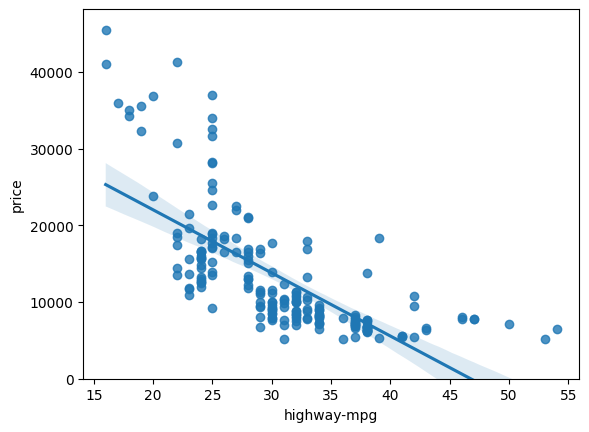

In [21]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that `price` is negatively correlated to `highway-mpg`, since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to **how scattered the data points are around the regression line.** This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Thinking back to our last lab, we made these same plots to determine these same plots to determine how effective of a predictor a single variable would be. 

### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a **residual**?

The difference between the observed(actual) value $Y$ and the predicted value $\hat{y}$ is called the residual $e$. When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a **residual plot**?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:
- If the points in a residual plot are **randomly spread out around the x-axis**, then a **linear model is appropriate** for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

To make a residual plot of highway-mpg, we use:
```
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()
```

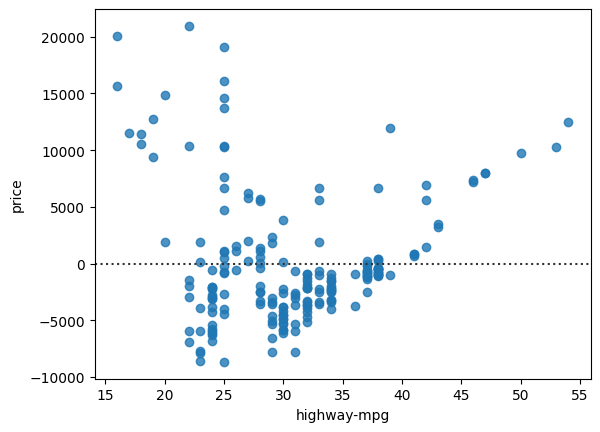

In [22]:
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

What is this plot telling us? Is a linear model appropriate for this data?

### Visualizing Multiple Linear Regression
How do we visualize a model for multiple linear regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the **distribution plot**. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

Let's use model `lm2` with $X$ predictors horsepower, curb-weight, engine-size, and highway-mpg stored in variable `Z`. First, compute the $\hat{Y}$ values for `Z` and store them.

In [23]:
yh = lm2.predict(Z)

To make a distribution plot, we want to use seaborn's `kdeplot()`. Use this code to make the plot, **then** use matplotlib functions to add x and y labels, a legend, and a title. 

```
sns.kdeplot(data=df['price'], color="r", label="Actual Value")
sns.kdeplot(data=yh, color="b", label="Fitted Values")

```

<Axes: xlabel='price', ylabel='Density'>

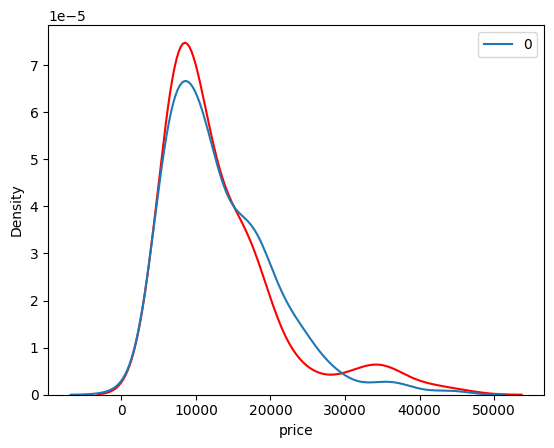

In [24]:
sns.kdeplot(data=df['price'], color="r", label="Actual Value")
sns.kdeplot(data=yh, color="b", label="Fitted Values")

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines

**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models. We get non-linear relationships by squaring or setting higher-order terms of the predictor variables. There are different orders of polynomial regression:

- **Quadratic - 2nd Order**: $\hat{Y} = a + b_1 X + b_2 X^2$
- **Cubic - 3rd Order**: $\hat{Y} = a + b_1 X + b_2 X^2 + b_3 X^3$
- **Higher Order**: $\hat{Y} = a + b_1 X + b_2 X^2 + b_3 X^3 + ...$

### Polynomial regression of highway-mpg

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a *cubic* polynomial model to the data instead.

Let's start by getting our $X$ and $Y$ variables sorted. Set `a` to the `highway-mpg` column and `a` to the `price` column. Don't worrk about making `a` 2D this time. 

In [25]:
a = df["highway-mpg"]
b = df["price"]

To fit our polynomial regression line, we are going to use numpy's `polyfit(...)` function with parameters `a`, `b`, and 3(since we want to make a cubic model). `polyfit()` will return a function, which we need to save as a variable. To get our model, we need to run it through numpy's `poly1d(...)` which will take your polynomial regression line in as a varaible. Save it as variable `p` and print the result to get your line of best fit.

In [26]:
p = np.polyfit(a,b,3)
p = np.poly1d(p)
p

poly1d([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

Using the provided function, plot the polynomial fit line you just created.
```
def plot_poly(model, independent_variable, dependent_variable, xlabel, ylabel, plot_title):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(plot_title)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()
```

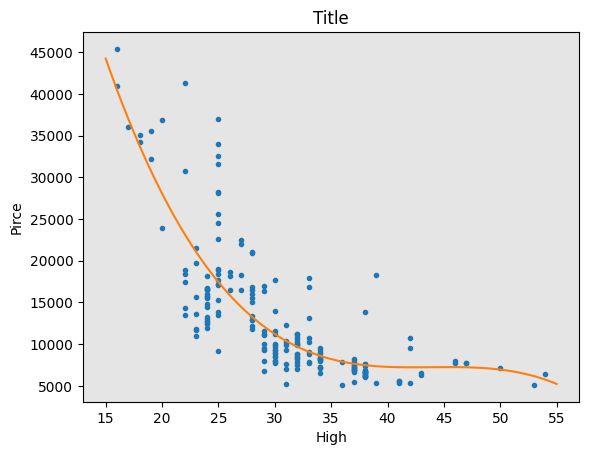

In [27]:
def plot_poly(model, independent_variable, dependent_variable, xlabel, ylabel, plot_title):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(plot_title)
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()
plot_poly(p,a,b,"High","Pirce","Title")

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.

#### Let's try an another order model!
Using `np.polyfit()` and `np.poly1d()` just like above, fit and plot a new **11th order** model.

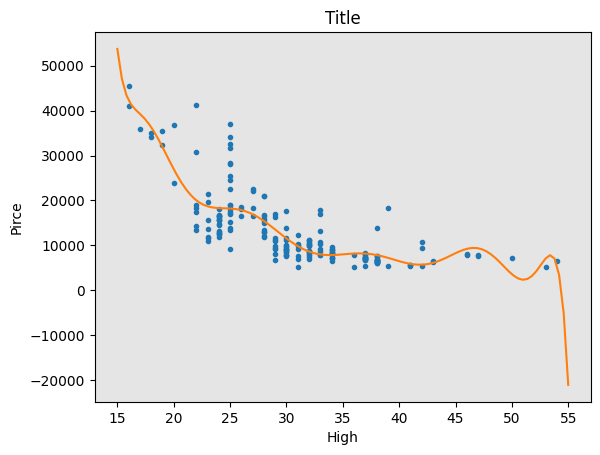

In [28]:
plot_poly(np.poly1d(np.polyfit(a,b,11)),a,b,"High","Pirce","Title")

That looks pretty good, but we need to watch out for **overfitting**. Overfitting occurs when the model it fit too closely to the *training data*, so it performs poorly with real data. It's likely that our cubic model will actually perform better in practice because of the randomness in the real world. Although, **underfit** models that are too simple to accurately predict results aren't any good either! We didn't do it with this example, but this is why it is important to separate out some of your original data as *testing data* that you can use to test your model after you create it. 

Later in this lab, we will do some statistical tests to assess the quality of our model and compare the different models we made. 

### Polynomial regression with multiple variables 
The expression for multivariate polynomial functions can get complicated! For example, the standard form for a second-order polynomial with two variables is given by:
$$
\hat{y} = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

THis would be pretty complicated to do by hand, but `scikit-learn` helps us to create **pipelines** to automate some of this process. Let's try to make a second-order polynomial for the same 4 features as our first multiple linear regression line `lm2`. The first thing we need to do is import the correct library for polynomial features: `from sklearn.preprocessing import PolynomialFeatures` 

In [29]:
from sklearn.preprocessing import PolynomialFeatures

For this model, we want our final polynomial to be of degree 2. So, we need to create a new object `pr` using the constructor `PolynomialFeatures(degree=#)`.

In [30]:
pr = PolynomialFeatures(degree=2)

Now that we have our `PolynomialFeatures` object set up, we can use the `fit_transform(...)` function with parameter `Z`. `Z` should be the 2D array we made eariler with columns `horsepower`, `curb-weight`, `engine-size`, and `highway-mpg`. Make sure to store the returned array in a new variable `Z_pr`.

In [31]:
Z_pr =  pr.fit_transform(Z)

But what did `fit_transform()` actually do? If we look the shape of our original `Z` (with `Z.shape`) we should there are 201 samples and 4 features. Our new `Z_pr` after the transformation should have there are 201 samples and 15 features.

For a smaller array the transformation would do something like this. 

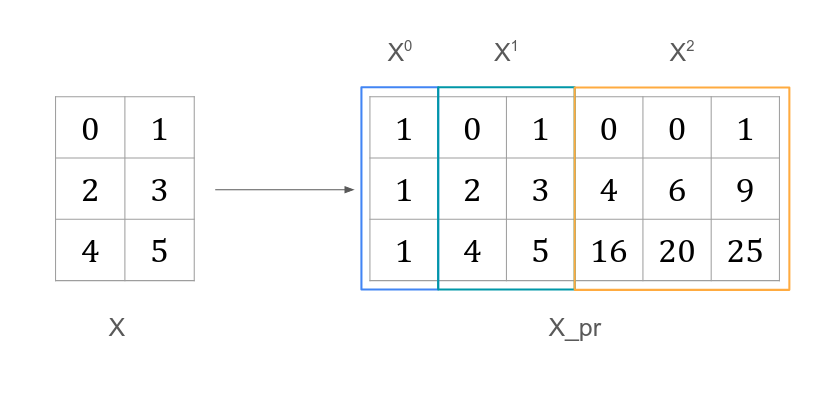

Essentially, we need to make columns that are multiples of all of our factors so we can weight them using traditional methods. At the end we will end up with coefficents for each of our factors individually and the linear combination of all of the factors. 

Check the shape of `Z` and `Z_pr` here.

In [32]:
print(Z.shape,Z_pr.shape)
z = Z

(200, 4) (200, 15)


### Pipeline

**There is nothing for you code in this Pipeline section, but please read it!!!**


Data pipelines simplify the steps of processing data. We will use the module `Pipeline` from `sklearn` to build ours. Our pipeline will use the `PolynomialFeatures` module we just talked about and `LinearRegression` from earlier as well as `StandardScalar`. 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor(ex. `('scale',StandardScaler())`). In our list, we want our three items to be in the order StandardScaler, PolynomialFeatures, and LinearRegression.


In [34]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Then, we input the list we just made as an argument to the pipeline constructor.

In [35]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type `Z` to type float to avoid conversion warnings that may appear as a result of `StandardScaler` taking float inputs.

Then, we can normalize the data, perform a transform, and fit the model simultaneously.


In [36]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform, and produce a prediction  simultaneously.

In [37]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[   27.        , 13095.64294486],
       [   26.        , 18226.1683919 ],
       [   30.        , 10389.2689322 ],
       [   22.        , 16122.24836083]])

### Measures for In-Sample Evaluation

Ok, so we made all these models. Now how do we determine what the best model is?

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:
1. **$R^2$ / R-squared**
2. **Mean Squared Error (MSE)**

**R-squared**

R-squared, also known as the *coefficient of determination*, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable ($Y$) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value ($Y$) and the estimated value ($\hat{Y}$)


#### Model 1: Simple Linear Regression

Let's calculate the $R^2$ value for our first simple linear regression model, predicting 'price' from 'highway-mpg'. Our model is named `lm` with data 'highway-mpg'(`x`) and 'price'(`y`). So to fit the model we can use `lm.fit(x,y)` again. Then to get the $R^2$ value, we can use the function `.score()` the the same parameters.

In [38]:
lm.score(x,y)

0.7485933762863262

We can say that \~49.718% of the variation of the price is explained by this simple linear model `lm` of 'highway-mpg'.


Let's calculate the MSE. 

The first thing we need to do is make some predictions. We can predict the output i.e., $\hat{Y}$ using the `predict()` method, where `x` is the input variable. 

In [39]:
y_hat = lm.predict(x)

Now to actually calculate MSE. 

First import the function `mean_squared_error` from the module `sklearn.metrics`*. Then, use the function `.mean_squared_error(y, y_hat)` which will return the MSE value. `y_hat` should be the list you just got in the last cell.

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_hat)

15877697.705406493

#### Model 2: Multiple Linear Regression

Let's calculate the $R^2$ for our first multiple linear regression `lm2` and it's predictor data(`Z`) and 'price'(`y`):

In [42]:
lm2.score(z,y)

ValueError: y_true and y_pred have different number of output (2!=1)

We can say that \~80.944 % of the variation of price is explained by this multiple linear regression with "horsepower, "curb-weight", "engine-size", and "highway-mpg"


Let's calculate the MSE.

First make a prediction then use the `mean_squared_error()` function.


In [ ]:
mean_squared_error(y,lm2.predict(z))

ValueError: y_true and y_pred have different number of output (2!=1)

#### Model 3: Polynomial Fit

Let's calculate the $R^2$. Since we created our cubic polynomial using a different function, we will need a more robust $R^2$ calculator. Let's use `r2_score` from the module `sklearn.metrics`.


Now, we can apply the function to get the value of $R^2$ like this `r2_score(b, p(a))`(assuming `a` and `b` are still the same input data and `p` is the name of your model).

We can say that \~67.427 % of the variation of price is explained by this polynomial fit.


We can also calculate the MSE with the name function as before.

### Prediction and Decision Making

#### Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?


**What is a good R-squared value?**
- When comparing models, *the model with the higher R-squared value is a better fit* for the data.


**What is a good MSE?**
- When comparing models, *the model with the smallest MSE value is a better fit* for the data.


#### Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
- R-squared:
- MSE:

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared:
- MSE:

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
- R-squared:
- MSE:

#### Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and $R^2$.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
- **R-squared**: 
- **MSE**: 

**Conclusion**:

#### Simple Linear Model (SLR) vs. Polynomial Fit
- **R-squared**: 
- **MSE**: 

**Conclusion**:

### Multiple Linear Regression (MLR) vs. Polynomial Fit
- **R-squared**: 
- **MSE**: 

**Conclusion**:

## Conclusion

Comparing these three models, we conclude that the ________ model is the best model to be able to predict price from our dataset. This makes sense because _____.